<a href="https://colab.research.google.com/github/matheus-mtz/mvp_puc_sprint/blob/main/MVP_final_matheus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pós-Graduação em Ciência de Dados e Analitycs - PUC-Rio**

## ***MVP - Sprint II: Machine Learning & Analytics***

####Autor: Matheus Martinez de Carvalho

#####Pontifícia Universidade Católica do Rio de Janeiro
#####Julho de 2023

#PARTE 1

#Contextualiazação

---

A qualidade do sono é um fator crucial para o bem-estar físico, mental e emocional dos indivíduos, desempenhando um papel fundamental na manutenção da saúde geral. No entanto, diversos fatores podem afetar negativamente o sono, resultando em problemas como insônia, distúrbios respiratórios e outros distúrbios do sono, como a apneia do sono. A compreensão aprofundada desses fatores e sua associação com a saúde do sono é essencial para aprimorar as estratégias de intervenção e tratamento.

Este estudo tem como objetivo analisar os principais fatores que impactam a saúde do sono e investigar a relação específica com o desenvolvimento da apneia do sono.

***Ao realizar essa análise, esperamos identificar padrões e associações importantes que possam contribuir para a compreensão mais profunda da relação entre entre fatores de saúde e hábitos das pessoas e a apneia do sono.***

A relevância deste estudo reside no crescente impacto que problemas relacionados ao sono têm na saúde pública. Com o aumento do estresse da vida moderna, os distúrbios do sono se tornaram uma preocupação de saúde pública, afetando uma grande parcela da população em diferentes faixas etárias. Portanto, ao compreender melhor os fatores que influenciam a saúde do sono e a apneia do sono, podemos potencialmente desenvolver abordagens mais personalizadas e eficientes para promover um sono saudável e melhorar a qualidade de vida dos indivíduos.

#Base de dados#

---
O conjunto de dados sobre Saúde do Sono e Estilo de Vida é composto por 400 linhas e 13 colunas, abrangendo uma ampla gama de variáveis relacionadas ao sono e hábitos diários. Ele inclui detalhes como gênero, idade, ocupação, duração do sono, qualidade do sono, nível de atividade física, níveis de estresse, categoria do IMC, pressão sanguínea, frequência cardíaca, passos diários e a presença ou ausência de distúrbios do sono.

Download:https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset

In [1]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import RFE # para a Eliminação Recursiva de Atributos

In [2]:
# Carga do dataset
data2 = "/Sleep_health_and_lifestyle_dataset.csv"
sleep = pd.read_csv(data2)

sleep.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [3]:
#contamos valores NAs
sleep.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

Por simplificação, para este trabalho vamos desconsiderar a pressão arterial e a profissão dos candidatos.

In [4]:
# Exclua a coluna 'Blood Pressure'
sleep = sleep.drop('Blood Pressure', axis=1)
sleep = sleep.drop('Occupation', axis=1)
sleep.head()

,Person ID,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,6.1,6,42,6,Overweight,77,4200,None
1,2,Male,28,6.2,6,60,8,Normal,75,10000,None
2,3,Male,28,6.2,6,60,8,Normal,75,10000,None
3,4,Male,28,5.9,4,30,8,Obese,85,3000,Sleep Apnea
4,5,Male,28,5.9,4,30,8,Obese,85,3000,Sleep Apnea


In [5]:
sleep.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [6]:
#Instâncias e atributos
sleep.shape

(374, 11)

É realizado o processo de One-hot encoding para a coluna "BMI Category" e para a coluna "Sleep Disorder" para a criação da coluna "target".

In [7]:
#Realizar o processo de One-Hot Encoding BMI Category
sleep2 = pd.get_dummies(sleep, columns=['BMI Category'])
#Realizar o processo de One-Hot Encoding
sleep3 = pd.get_dummies(sleep2, columns=['Gender'])
#Realizar o processo de One-Hot Encoding
sleep4 = pd.get_dummies(sleep3, columns=['Sleep Disorder'])

In [8]:
sleep4.head()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,BMI Category_Normal,BMI Category_Normal Weight,BMI Category_Obese,BMI Category_Overweight,Gender_Female,Gender_Male,Sleep Disorder_None,Sleep Disorder_Sleep Apnea
0,1,27,6.1,6,42,6,77,4200,0,0,0,1,0,1,1,0
1,2,28,6.2,6,60,8,75,10000,1,0,0,0,0,1,1,0
2,3,28,6.2,6,60,8,75,10000,1,0,0,0,0,1,1,0
3,4,28,5.9,4,30,8,85,3000,0,0,1,0,0,1,0,1
4,5,28,5.9,4,30,8,85,3000,0,0,1,0,0,1,0,1


In [9]:
# Excluindo colunas para não haver colinearidade
sleep4 = sleep4.drop('BMI Category_Normal', axis=1)
sleep4 = sleep4.drop('BMI Category_Normal Weight', axis=1)
sleep4 = sleep4.drop('Sleep Disorder_None', axis=1)
sleep4 = sleep4.drop('Gender_Female', axis=1)
sleep4.rename(columns={'Sleep Disorder_Sleep Apnea': 'target'}, inplace=True)
sleep4.head()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,BMI Category_Obese,BMI Category_Overweight,Gender_Male,target
0,1,27,6.1,6,42,6,77,4200,0,1,1,0
1,2,28,6.2,6,60,8,75,10000,0,0,1,0
2,3,28,6.2,6,60,8,75,10000,0,0,1,0
3,4,28,5.9,4,30,8,85,3000,1,0,1,1
4,5,28,5.9,4,30,8,85,3000,1,0,1,1


In [10]:
#Instâncias e atributos
sleep4.shape

(374, 12)

## Separação em conjunto de treino e conjunto de teste com holdout

In [11]:
test_size = 0.20 # tamanho do conjunto de teste
seed = 7 # semente aleatória

# Separação em conjuntos de treino e teste
array = sleep4.values
X = array[:,1:12]
y = array[:,11]
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

###Seleção de atributos

A seleção de atributos no dataset "The Sleep Health and Lifestyle" é justificada para simplificar a análise, melhorar o desempenho computacional, evitar overfitting, concentrar-se em variáveis relevantes e aumentar a interpretabilidade dos resultados relacionados à apneia do sono.

In [12]:
# Eliminação Recursiva de Atributos

# Criação do modelo
modelo = LogisticRegression(max_iter=200)

# Eliminação Recursiva de Atributos
rfe = RFE(modelo, n_features_to_select=4)
fit = rfe.fit(X, y)

# Print dos resultados
print("Atributos Originais:", sleep4.columns[0:11])

# Exibe os atributos selecionados (marcados como True em "Atributos Selecionados"
# e com valor 1 em "Ranking dos Atributos")
print("\nAtributos Selecionados: %s" % fit.support_)
print("\nRanking de atributos: %s" % fit.ranking_)
print("\nQtd de melhores Atributos: %d" % fit.n_features_)
print("\nNomes dos Atributos Selecionados: %s" % fit.get_feature_names_out(input_features=sleep4.columns[0:11]))

Atributos Originais: Index(['Person ID', 'Age', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps',
       'BMI Category_Obese', 'BMI Category_Overweight', 'Gender_Male'],
      dtype='object')

Atributos Selecionados: [False False  True False False False False False  True  True  True]

Ranking de atributos: [6 3 1 7 4 2 8 5 1 1 1]

Qtd de melhores Atributos: 4

Nomes dos Atributos Selecionados: ['Sleep Duration' 'BMI Category_Obese' 'BMI Category_Overweight'
 'Gender_Male']


Foram selecionados os atributos de: duração do sono, obesidade, sobrepeso e se o indivíduo é homem.


## Modelagem e Inferência`

### Criação e avaliação de modelos: linha base

LR: 0.986667 (0.026667)
KNN: 0.933103 (0.057739)
CART: 1.000000 (0.000000)
NB: 1.000000 (0.000000)
SVM: 0.849425 (0.040413)
Bagging: 1.000000 (0.000000)
RF: 1.000000 (0.000000)
ET: 1.000000 (0.000000)
Ada: 1.000000 (0.000000)
GB: 1.000000 (0.000000)
Voting: 0.986667 (0.026667)


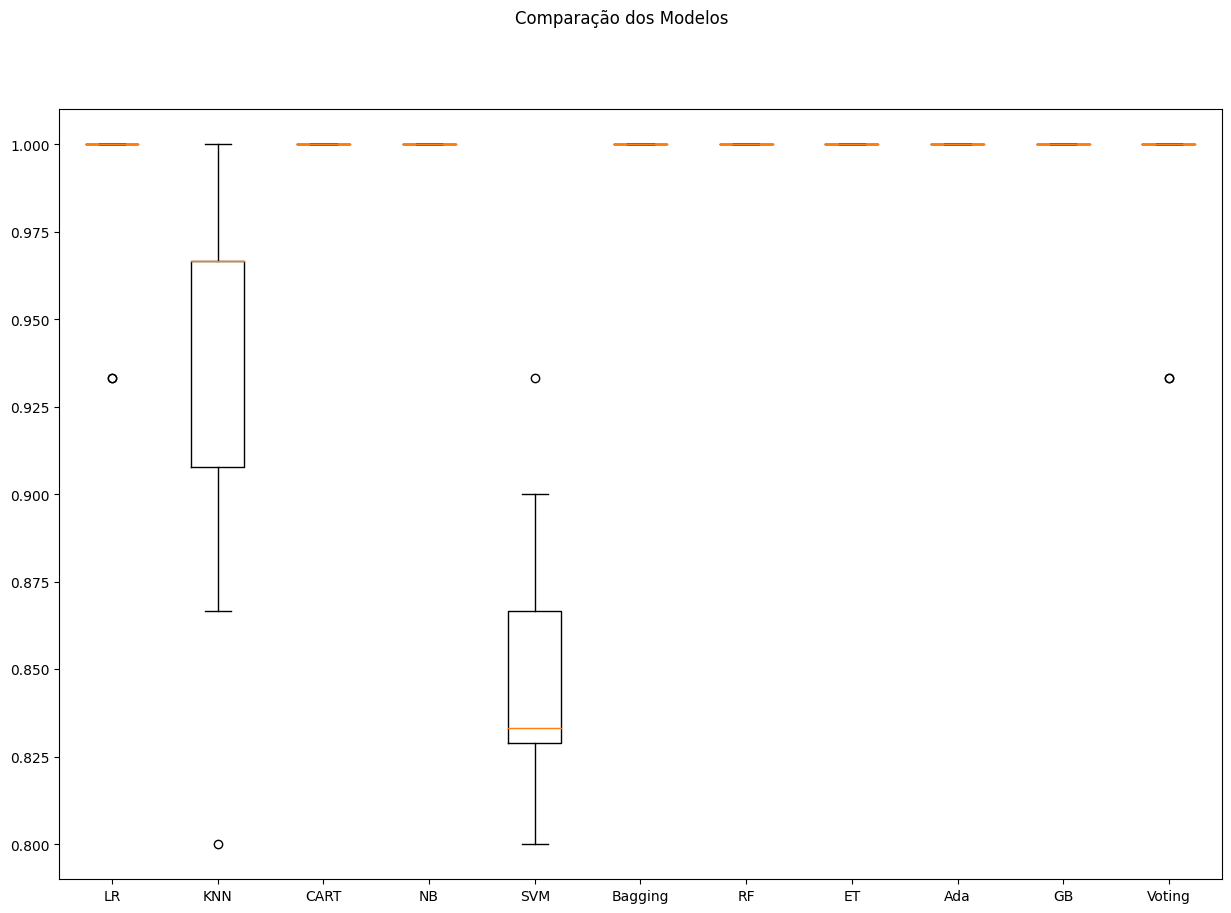

In [13]:
np.random.seed(7) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingClassifier(base_estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(bases)))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Análise: O melhor modelo seria o de regressão logística com acurácio de 98,6667%

###Avaliação da distribuição das variáveis

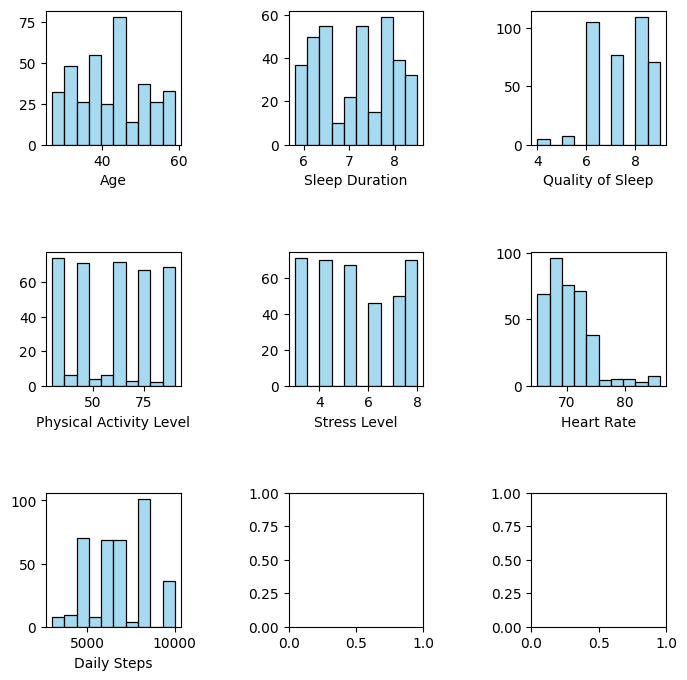

In [14]:
fig, axs = plt.subplots(3, 3, figsize=(8, 8))
plt.subplots_adjust(wspace=0.8, hspace=0.8)

numeric = ["Age", "Sleep Duration", "Quality of Sleep", "Physical Activity Level", "Stress Level", "Heart Rate", "Daily Steps"]

for i, cat in enumerate(numeric):
    sns.histplot(sleep4[cat], bins=10, color='skyblue', ax=axs[int(i/3), i%3]).set_ylabel("")

plt.show()

### Criação e avaliação de modelos: dados padronizados e normalizados

LR-orig: 0.987 (0.027)
KNN-orig: 0.933 (0.058)
CART-orig: 1.000 (0.000)
NB-orig: 1.000 (0.000)
SVM-orig: 0.849 (0.040)
Bag-orig: 1.000 (0.000)
RF-orig: 1.000 (0.000)
ET-orig: 1.000 (0.000)
Ada-orig: 1.000 (0.000)
GB-orig: 1.000 (0.000)
Vot-orig: 0.987 (0.027)
LR-padr: 1.000 (0.000)
KNN-padr: 0.970 (0.038)
CART-padr: 1.000 (0.000)
NB-padr: 0.997 (0.010)
SVM-padr: 0.990 (0.015)
Bag-padr: 1.000 (0.000)
RF-padr: 1.000 (0.000)
ET-padr: 1.000 (0.000)
Ada-padr: 1.000 (0.000)
GB-padr: 1.000 (0.000)
Vot-padr: 1.000 (0.000)
LR-norm: 0.997 (0.010)
KNN-norm: 0.980 (0.031)
CART-norm: 1.000 (0.000)
NB-norm: 1.000 (0.000)
SVM-norm: 1.000 (0.000)
Bag-norm: 1.000 (0.000)
RF-norm: 1.000 (0.000)
ET-norm: 1.000 (0.000)
Ada-norm: 1.000 (0.000)
GB-norm: 1.000 (0.000)
Vot-norm: 1.000 (0.000)


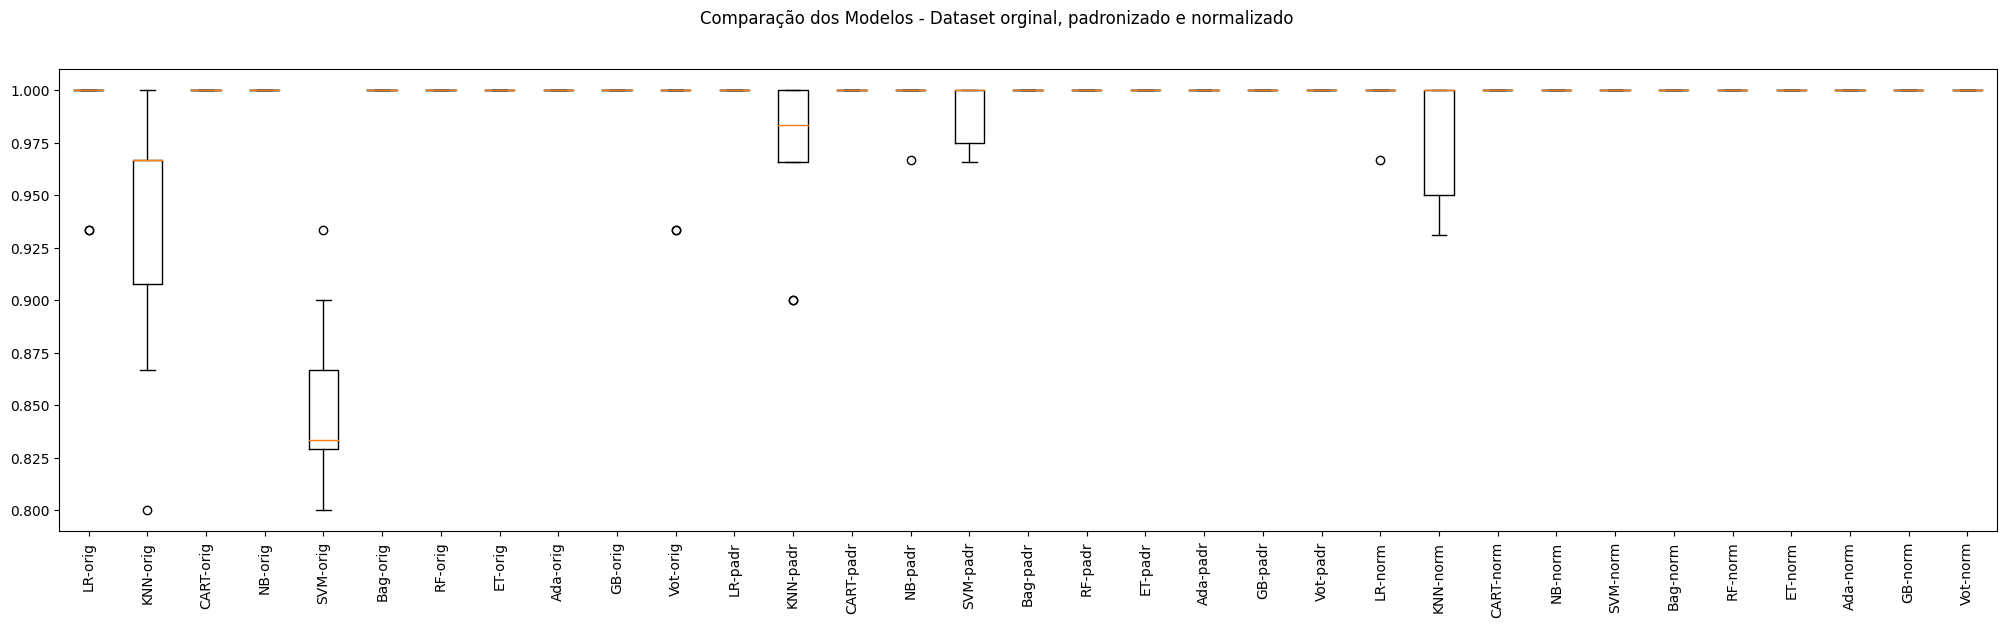

In [15]:
np.random.seed(7) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
reg_log = ('LR', LogisticRegression(max_iter=200))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())
bagging = ('Bag', BaggingClassifier(base_estimator=base, n_estimators=num_trees))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
voting = ('Voting', VotingClassifier(bases))

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original
pipelines.append(('LR-orig', Pipeline([reg_log])))
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))
pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('Vot-orig', Pipeline([voting])))

# Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log])))
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))
pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging])))
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log])))
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))
pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging])))
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

Com a padronização e a normalização dos atributos, houve pequena melhora do modelo de regressão logística, não justificando tais procedimentos.

### Otimização dos hiperparâmetros

In [16]:
# Tuning do KNN

np.random.seed(7) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
knn = ('KNN', KNeighborsClassifier())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('knn-orig', Pipeline(steps=[knn])))
pipelines.append(('knn-padr', Pipeline(steps=[standard_scaler, knn])))
pipelines.append(('knn-norm', Pipeline(steps=[min_max_scaler, knn])))

param_grid = {
    'KNN__n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
    'KNN__metric': ["euclidean", "manhattan", "minkowski"],
}

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

Sem tratamento de missings: knn-orig - Melhor: 0.942989 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 1}
Sem tratamento de missings: knn-padr - Melhor: 0.979885 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 1}
Sem tratamento de missings: knn-norm - Melhor: 0.979885 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 1}


## Finalização do Modelo

In [17]:
# Avaliação do modelo com o conjunto de testes

# Preparação do modelo
scaler = StandardScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
rescaledX = scaler.transform(X_train) # aplicação da padronização no conjunto de treino
model = LogisticRegression(max_iter=200)
model.fit(rescaledX, y_train)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test) # aplicação da padronização no conjunto de teste
predictions = model.predict(rescaledTestX)
print(accuracy_score(y_test, predictions))

1.0


In [18]:
# Preparação do modelo com TODO o dataset
scaler = StandardScaler().fit(X) # ajuste do scaler com TODO o dataset
rescaledX = scaler.transform(X) # aplicação da padronização com TODO o dataset
model.fit(rescaledX, y)

LogisticRegression(max_iter=200)

## Simulando a aplicação do modelo em dados não vistos

In [19]:
# Novos dados - não sabemos a classe!
data = {'Person ID': [1000, 1001, 1002], 'Age': [20, 35, 68],
        'Sleep Duration': [5, 7, 6],
        'Quality of Sleep': [4, 7, 6],
        'Physical Activity Level': [20, 40, 30],
        'Stress Level': [8, 4, 8],
        'Heart Rate': [85, 77, 70],
        'Daily Steps': [1500, 5000, 2000],
        'BMI Category_Obese': [1, 0, 1],
        'BMI Category_Overweight': [0, 1, 0], 'Gender_Male': [1, 0, 1]}

atributos = ['Person ID', 'Age', 'Sleep Duration', 'Quality of Sleep',
             'Physical Activity Level', 'Stress Level',
             'Heart Rate', 'Daily Steps', 'BMI Category_Obese',
             'BMI Category_Overweight', 'Gender_Male']
entrada = pd.DataFrame(data, columns=atributos)

array_entrada = entrada.values
X_entrada = array_entrada[:,0:11].astype(float)

# Padronização nos dados de entrada usando o scaler utilizado em X
rescaledEntradaX = scaler.transform(X_entrada)
print(rescaledEntradaX)

[[ 1.10582708e+02  1.61943607e+01 -1.93485192e+00 -2.65208344e+00
   8.24701785e+00 -1.50517252e+01 -4.16638697e+00  9.29831871e+03
   1.23572935e+00 -1.01075300e+00  1.94804307e+00]
 [ 1.10698161e+02  3.50719661e+01 -2.61708295e-01 -2.50787303e+00
   1.95327283e+01 -1.60202147e+01 -4.17133822e+00  3.09947824e+04
  -8.09238690e-01  9.89361400e-01 -5.13335673e-01]
 [ 1.10813614e+02  7.66026979e+01 -1.09828011e+00 -2.55594317e+00
   1.38898731e+01 -1.50517252e+01 -4.17567058e+00  1.23978135e+04
   1.23572935e+00 -1.01075300e+00  1.94804307e+00]]


In [20]:
# Predição de classes dos dados de entrada
saidas = model.predict(rescaledEntradaX)
print(saidas)

[1. 1. 1.]


Dado a nova amostra, todos os três indivíduos teriam apneia do sono.

#PARTE 2

##Introdução

O processamento de linguagem natural (PLN) é uma área de estudo que visa a capacidade das máquinas em compreender e interpretar a linguagem humana de forma semelhante à comunicação entre pessoas. Essa tecnologia tem encontrado aplicações diversas em diversas áreas, como tradução automática, chatbots, análise de sentimentos, entre outras. Neste trabalho, buscaremos explorar o poder do PLN aplicado à análise do conto "Laços de Família", da renomada escritora brasileira Clarice Lispector.

##Contextualização

"Laços de Família" é uma das mais emblemáticas obras de Clarice Lispector, presente no livro homônimo lançado em 1960. O conto narra uma série de relações familiares complexas, trazendo à tona as sutilezas, conflitos e ambiguidades inerentes aos laços afetivos. Através de sua prosa profunda e introspectiva, Lispector explora a essência humana e as nuances das relações familiares, tornando a obra um rico campo de estudo para análise com a utilização do PLN.

##Proposta

A proposta deste trabalho é aplicar técnicas de processamento de linguagem natural para examinar o texto do conto "Laços de Família" e extrair informações relevantes, como a identificação de temas recorrentes, análise de sentimentos dos personagens, avaliação da estrutura narrativa, entre outros aspectos. Por meio do PLN, esperamos obter uma compreensão mais aprofundada do conto e oferecer insights valiosos sobre os elementos literários e emocionais presentes na obra.

Além disso, o estudo do conto de Clarice Lispector com o auxílio do PLN pode contribuir para a análise comparativa com outras obras literárias, enriquecendo o campo de estudos da literatura e demonstrando o potencial do PLN na exploração de textos literários complexos.

##Dataset

O dataset pode ser baixado em:
https://drive.google.com/file/d/1kptrMJU3FZNlemQiWNgPvE1eMkeZsglo/view?usp=sharing

In [21]:
import re  # For preprocessing
import pandas as pd  # For data handling
from time import time  # To time our operations
from collections import defaultdict  # For word frequency

import spacy  # For preprocessing

import logging  # Setting up the loggings to monitor gensim
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)

In [22]:
!python3 -m spacy download pt_core_news_sm
from spacy.lang.pt.examples import sentences


2023-07-24 02:31:22.872771: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 70.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')


In [23]:
import nltk

Antes de começarmos a análise precisamos extrair caracteres não alfa-numéricos, stop-words e reduzir as palavras ao seu radical. Isto é uma etapa essencial no pré-processamento de dados.

In [24]:
with open('/Os Laços de Família.txt', 'r', encoding='utf-8') as arquivo:
    raw_text = arquivo.read()

spacy.cli.download("pt_core_news_sm")
nlp = spacy.load('pt_core_news_sm', disable=['ner', 'parser']) # disabling Named Entity Recognition for speed

def cleaning(doc):
    # Lemmatizes and removes stopwords
    # doc needs to be a spacy Doc object
    txt = [token.lemma_ for token in doc if not token.is_stop]
    # Word2Vec uses context words to learn the vector representation of a target word,
    # if a sentence is only one or two words long,
    # the benefit for the training is very small
    if len(txt) > 2:
        return ' '.join(txt)

new_str = re.sub(r'[^\w\s]', '', raw_text).lower() #remover caracteres não-alfa numéricos
t = time()
doc = nlp(new_str)
txt = cleaning(doc)

print('Time to clean up everything: {} mins'.format(round((time() - t) / 60, 2)))

✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
Time to clean up everything: 0.0 mins


In [25]:
txt = txt.split('\n')
txt

['laço família ',
 '',
 ' mulher mãe acomodaramse finalmente táxi levario estação mãe contar recontar mala tentar convencerse estar carro filha olho escuros ligeiro estrabismo dar contínuo brilho zombaria frieza assistia ',
 '',
 '  esqueci perguntar mãe ',
 '',
 '  esquecer responder filha diverter paciência ',
 '',
 ' impressão cena cômico mãe marido hora despedida durante semana visita velho haver suportar bonsdia boastarde soar delicadeza cauteloso querer rir eis hora despedida entrar táxi mãe transformar sogra exemplar marido tornar genro perdoe algum palavra dizer dissera velho senhora catarina algum alegria vira Antônio mala mão gaguejar   perturbar genro rio pensar louco pensar catarina franzir sobrancelha casa filho perder filho casa filha ganhar acrescentara mãe Antônio aproveitar gripe tossir catarina pé observar malícia marido segurança desvanecerar homem moreno miúdo forçar filho mulherzinha grisalha vontade rir tornouse forte felizmente precisar rir fato ter vontade rir o

Vamos criar um dataframe com o texto processado

In [26]:
data_dict = {'clean': txt}
df_clean = pd.DataFrame(data_dict)
df_clean = df_clean.dropna().drop_duplicates()
df_clean.shape

(39, 1)

In [27]:
!pip install gensim
from gensim.models.phrases import Phrases, Phraser

In [28]:
sent = [row.split() for row in df_clean['clean']]
sent

[['laço', 'família'],
 [],
 ['mulher',
  'mãe',
  'acomodaramse',
  'finalmente',
  'táxi',
  'levario',
  'estação',
  'mãe',
  'contar',
  'recontar',
  'mala',
  'tentar',
  'convencerse',
  'estar',
  'carro',
  'filha',
  'olho',
  'escuros',
  'ligeiro',
  'estrabismo',
  'dar',
  'contínuo',
  'brilho',
  'zombaria',
  'frieza',
  'assistia'],
 ['esqueci', 'perguntar', 'mãe'],
 ['esquecer', 'responder', 'filha', 'diverter', 'paciência'],
 ['impressão',
  'cena',
  'cômico',
  'mãe',
  'marido',
  'hora',
  'despedida',
  'durante',
  'semana',
  'visita',
  'velho',
  'haver',
  'suportar',
  'bonsdia',
  'boastarde',
  'soar',
  'delicadeza',
  'cauteloso',
  'querer',
  'rir',
  'eis',
  'hora',
  'despedida',
  'entrar',
  'táxi',
  'mãe',
  'transformar',
  'sogra',
  'exemplar',
  'marido',
  'tornar',
  'genro',
  'perdoe',
  'algum',
  'palavra',
  'dizer',
  'dissera',
  'velho',
  'senhora',
  'catarina',
  'algum',
  'alegria',
  'vira',
  'Antônio',
  'mala',
  'mão',

Vamos processar o texto para considerar bigramas. Esta etapa é importante para identificar palavras compostas.

In [29]:
phrases = Phrases(sent,min_count=1, progress_per=10)

In [30]:
bigram = Phraser(phrases)
sentences = bigram[sent]
sentences

In [31]:
word_freq = defaultdict(int)
for sent in sentences:
    for i in sent:
        word_freq[i] += 1
len(word_freq)

684

In [32]:
sorted(word_freq, key=word_freq.get, reverse=True)[:10]

['mãe',
 'catarina',
 'mulher',
 'olho',
 'filho',
 'ter',
 'menino',
 'olhar',
 'dizer',
 'homem']

#Treinando um modelo Word2Vec

Vamos agora treinar um modelo para retornar as palavras mais próximas dado o contexto da escrita deste conto de machado de assis.

Word2Vec():
Nesta primeira etapa, configuramos os parâmetros do modelo.

.build_vocab():
Aqui construímos o vocabulário a partir de uma sequência de frases e assim inicializamos o modelo.

.Train():
Finalmente, treinamos o modelo.


In [33]:
import multiprocessing

from gensim.models import Word2Vec
cores = multiprocessing.cpu_count()

#Estes são os parâmetros do modelo segundo a referência da bilbioteca Gensim:

*   min_count = int - Ignores all words with total absolute frequency lower than this - (2, 100)
*   window = int - The maximum distance between the current and predicted word within a sentence. E.g. window words on the left and window words on the left of our target - (2, 10)
*   size = int - Dimensionality of the feature vectors. - (50, 300)
*   sample = float - The threshold for configuring which higher-frequency words are randomly downsampled. Highly influencial. - (0, 1e-5)
*   alpha = float - The initial learning rate - (0.01, 0.05)
*   min_alpha = float - Learning rate will linearly drop to min_alpha as training progresses. To set it: alpha - (min_alpha * epochs) ~ 0.00
*   negative = int - If > 0, negative sampling will be used, the int for negative specifies how many "noise words" should be drown. If set to 0, no negative sampling is used. - (5, 20)
*  workers = int - Use these many worker threads to train the model (=faster training with multicore machines)



In [34]:
w2v_model = Word2Vec(min_count=3,
                     window=5,
                     sample=1e-3,
                     alpha=0.03,
                     min_alpha=0.0007,
                     negative=20,
                     workers=cores-1)
t = time()

#Vamos contruir o vocabulário
w2v_model.build_vocab(sentences)

print('Time to build vocab: {} mins'.format(round((time() - t) / 60, 2)))

Time to build vocab: 0.0 mins


In [35]:
t = time()

w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=20, report_delay=1)

print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))

Time to train the model: 0.0 mins


In [36]:
w2v_model.init_sims(replace=True)

#Vamos agora verificar a similaridade entre algumas palavras

In [37]:
w2v_model.wv.most_similar(positive=["sorrir"])

[('coisa', 0.9997434616088867),
 ('olhar', 0.9996824264526367),
 ('genro', 0.9996796250343323),
 ('mãe', 0.9996776580810547),
 ('mulher', 0.9996718168258667),
 ('mala', 0.9996570348739624),
 ('saber', 0.9996548891067505),
 ('haver', 0.9996546506881714),
 ('continuar', 0.9996428489685059),
 ('algum', 0.9996408820152283)]

In [38]:
w2v_model.wv.most_similar(negative=["sorrir"])

[('magro_nervoso', -0.9974645376205444),
 ('táxi', -0.9987701773643494),
 ('estar', -0.9989770650863647),
 ('dia', -0.9990454316139221),
 ('elevador', -0.999100923538208),
 ('perguntar', -0.9991315007209778),
 ('responder', -0.9991644024848938),
 ('poder', -0.9991731643676758),
 ('rir', -0.9991973042488098),
 ('ir', -0.9992253184318542)]